## Titanic Survival Prediction

- In this notebook, we would be aiming to predict the survival of passengers on the Titanic based on the data and features available to us.
- We would be exploring the data at an initial stage to get some insights from the data and then we would be processing the data inorder to ensure effective model development
- Certain Steps we would be following in the notebook includes:

 **1. Exploratory data analysis**
 
 **2. Feature Engineering**
 
 **3. Model Development and Metric analysis**.
 
 **4.  Final Prediction Submission.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize': [10, 6]}, font_scale=1.3)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

#### Loading the dataset

In [2]:

train=pd.read_csv('../input/titanic/train.csv')
test=pd.read_csv('../input/titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
train.describe(include='O').T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train.duplicated().sum()

0

###  *1. Exploratory Data Analysis*

#### Getting the Categorical and Numerical Features

In [9]:
Num_cols = [x for x in train.columns if train[x].dtypes != 'O']
Cat_cols = [x for x in train.columns if train[x].dtypes == 'O']
print(f'Numerical_columns are :- {Num_cols}')
print('_'*30)
print(f'Categorical_columns are :- {Cat_cols}')      

Numerical_columns are :- ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
______________________________
Categorical_columns are :- ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


#### Name and PassengerId are some unimportant columns and hence are dropped


In [10]:
train.drop(['Name','PassengerId'],axis = 1,inplace = True)
test.drop(['Name'],axis = 1,inplace = True)
Cat_cols.remove('Name')

### NULL Value Imputation

In [11]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

##### From above, we can see that there are NULL/NaN values present in the Dataset. Before we start with the Analysis, we need to process this data and then proceed with the EDA

**1. Age**

In [12]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

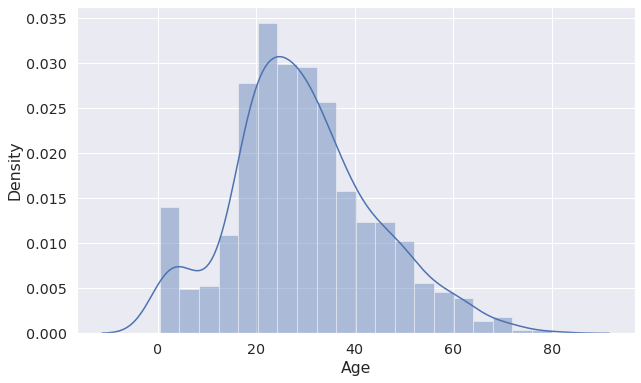

In [13]:
sns.distplot(train['Age'])

In [14]:
train.Age.fillna(train.Age.mean(),inplace = True)
test.Age.fillna(test.Age.mean(),inplace = True)

**2. Embarked**

In [15]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

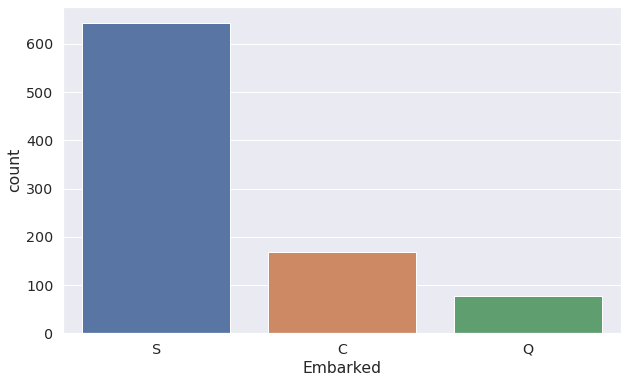

In [16]:
sns.countplot(data=train,x='Embarked')

#### From the above plot,Embarked is a categorical feature and hence we would be using Mode, the most common value i.e 'S' to impute the NULL values in the dataset

In [17]:
train.Embarked.fillna(train.Embarked.mode()[0],inplace = True)
test.Embarked.fillna(test.Embarked.mode()[0],inplace = True)

**3. Cabin**

In [18]:
(train[train['Cabin'].isna()].shape[0]/train.shape[0])*100

77.10437710437711

##### Further, in case of the column Cabin, 77% of the column values are NULL. Hence any imputation would lead to certain bias for the model, hence dropping the column from further analysis is considered

### I will drop Cabin and Ticket columns

In [19]:
train.drop(['Cabin','Ticket'],axis=1,inplace = True)
test.drop(['Cabin','Ticket'],axis=1,inplace = True)

In [20]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### EDA & Visualization

### Target "Survived"

In [21]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

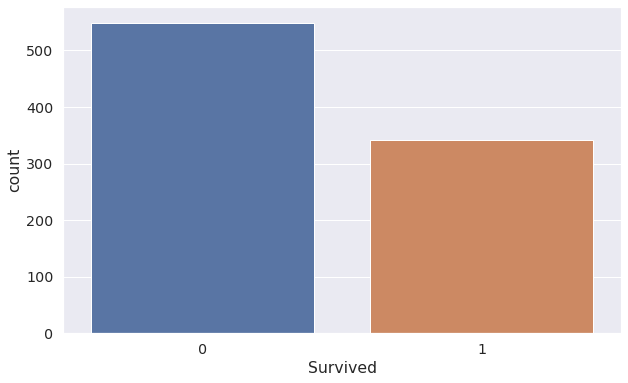

In [23]:
sns.countplot(train['Survived'])

### Categorical Features

In [24]:
cols=['Embarked','Sex']
for i in cols:
    print(f'col_name :- {i}')
    print(train[i].unique())
    print(train[i].value_counts())
    print(train[i].value_counts(normalize=True))
    print(f'no_of_unique_values :- {train[i].nunique()}')
    print("_"*50)

col_name :- Embarked
['S' 'C' 'Q']
S    646
C    168
Q     77
Name: Embarked, dtype: int64
S    0.725028
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64
no_of_unique_values :- 3
__________________________________________________
col_name :- Sex
['male' 'female']
male      577
female    314
Name: Sex, dtype: int64
male      0.647587
female    0.352413
Name: Sex, dtype: float64
no_of_unique_values :- 2
__________________________________________________


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


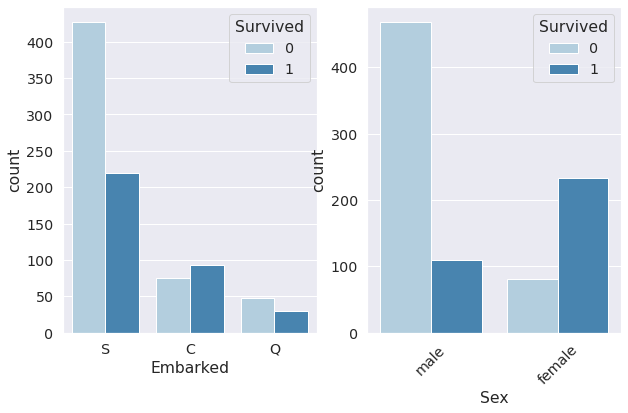

In [25]:
cols=['Embarked','Sex']
fig,ax=plt.subplots(1,2,figsize=(10,6))
for j,i in enumerate(cols):
    sns.countplot(train[i],hue=train['Survived'],ax=ax[j],palette='Blues')
    plt.xticks(rotation=45)
plt.show()    

In [26]:
train.groupby('Embarked')['Survived'].value_counts(normalize=True)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Embarked,Survived'>

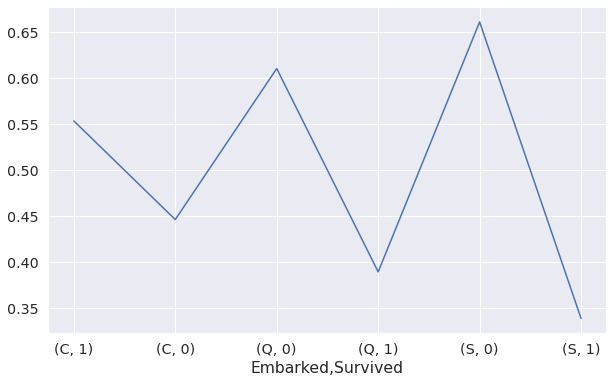

In [27]:
train.groupby('Embarked')['Survived'].value_counts(normalize=True).plot()

1. **Females are tend to survive more compared to males. Out of the total females, 74.2% of females are survived and of the males, only 18.9% are survived hence Sex stands an important feature in predicting the survival**
2. **In Embarked, S Category has the largest number of passengers and the survival percentage is also highest in it**
3. **For Each of the Passengers in Embarked Category as C, 55% of passengers were Survived and Out of the Total in Q, only 38% of them and for S, only 33.7% of them were survived. Henec people in C category were more likely to be rescued/survived.**

### Numerical Features

In [28]:
features = ['SibSp','Parch','Pclass']
for i in features:
    print(f'col_name :- {i}')
    print(train[i].unique())
    print(train[i].value_counts())
    print(f'no_of_unique_values :- {train[i].nunique()}')
    print("_"*50)

col_name :- SibSp
[1 0 3 4 2 5 8]
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
no_of_unique_values :- 7
__________________________________________________
col_name :- Parch
[0 1 2 5 3 4 6]
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
no_of_unique_values :- 7
__________________________________________________
col_name :- Pclass
[3 1 2]
3    491
1    216
2    184
Name: Pclass, dtype: int64
no_of_unique_values :- 3
__________________________________________________


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


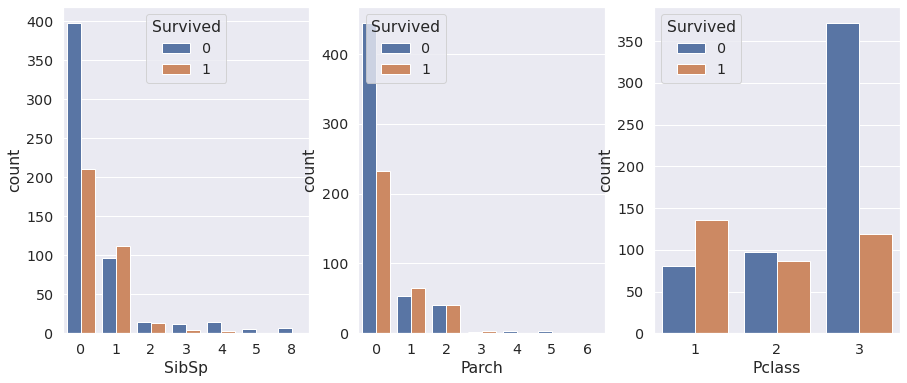

In [29]:
features = ['SibSp','Parch','Pclass']
fig,ax=plt.subplots(1,3,figsize=(15,6))
for j,i in enumerate(features):
    sns.countplot(train[i],hue=train['Survived'],ax=ax[j])


#### From the above plots, we can clearly derieve the following conclusions:

1. **Highest Number of people didnt survive from Pclass 3**

2. **From passengers in SibSp 5 and 8 none of them were able to survive. Common observations were both of these classes were having PClass as 3 and there wasnt able specific Cabin value available. Along with this, Embarked value was found to be S for both of these**

3. **Passengers in Parch 4 and 6, all of them were not survived**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


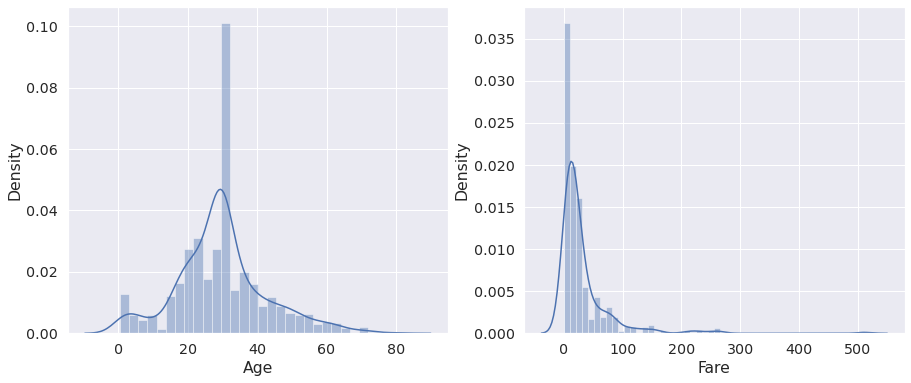

In [30]:
Num_cols=['Age','Fare']
fig,ax=plt.subplots(1,2,figsize=(15,6))
for j,i in enumerate(Num_cols):
    sns.distplot(train[i],ax=ax[j])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


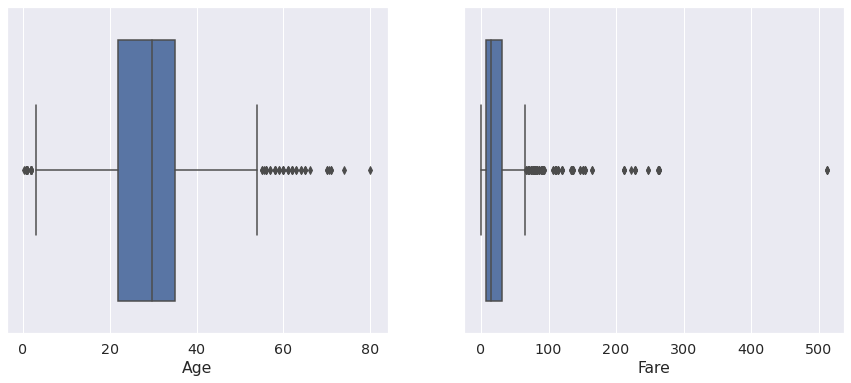

In [31]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
for j,i in enumerate(Num_cols):
    sns.boxplot(train[i],ax=ax[j])

#### From the above distribution plot, we can see that the Fare variable is right skewed

<AxesSubplot:>

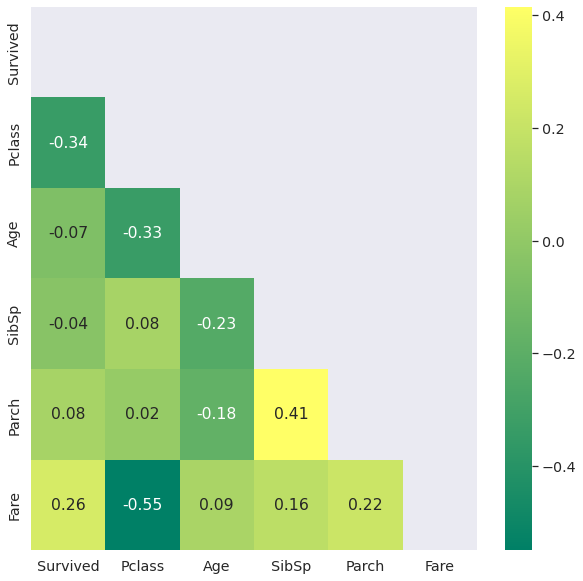

In [32]:
corr = train.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
plt.figure(figsize = (10,10))
sns.heatmap(train.corr(),annot = True,fmt='.02f',mask=mask,cmap='summer')


## Feature Encoding

- **Encoding the Categorical Variables into numerical ones to make it useful for the Machine Learning Model that gets trained**
- **Here we have used the One-hot encoding technique since we have less number of categories and is the most effective one**
- **Same transformations would be applied to the test data**

In [33]:
train=pd.get_dummies(columns=['Sex','Embarked'],data=train,drop_first=True)
test=pd.get_dummies(columns=['Sex','Embarked'],data=test,drop_first=True)

In [34]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<AxesSubplot:>

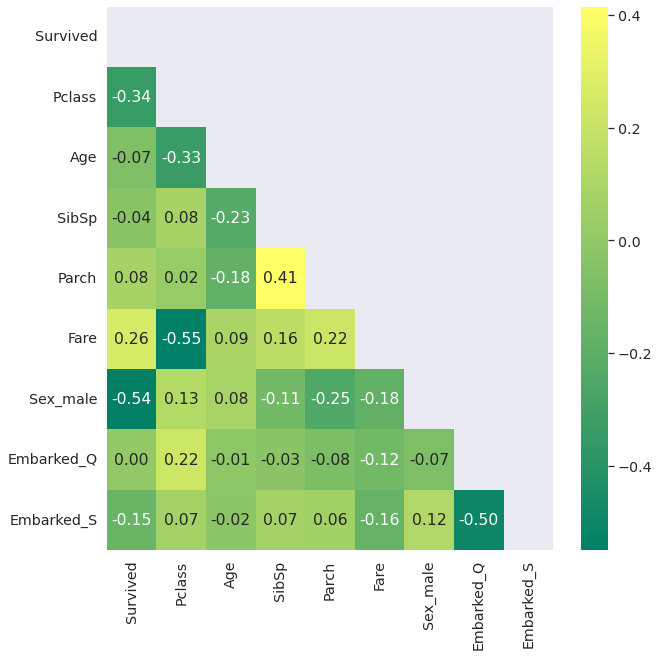

In [35]:
corr = train.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
plt.figure(figsize = (10,10))
sns.heatmap(train.corr(),annot = True,fmt='.02f',mask=mask,cmap='summer')

### Splitting Data into Features and Labels


In [36]:
x = train.drop('Survived',axis = 1)
y = train.Survived

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

## Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler
Num_cols=['Age','Fare']
scaler = MinMaxScaler()
scaler.fit(x_train[Num_cols])
x_train[Num_cols] = scaler.transform(x_train[Num_cols])
x_test[Num_cols] = scaler.transform(x_test[Num_cols])

In [39]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
331,1,0.566474,0,0,0.055628,1,0,1
733,2,0.283740,0,0,0.025374,1,0,1
382,3,0.396833,0,0,0.015469,1,0,1
704,3,0.321438,1,0,0.015330,1,0,1
813,3,0.070118,4,2,0.061045,0,0,1


### ML models

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

In [41]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(kernel='sigmoid'),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(n_estimators=70),
    "Naive Bayes": GaussianNB()
}

In [42]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.8033707865168539
Testing Accuracy: 0.7988826815642458
Testing Confusion Matrix: 
[[89 16]
 [20 54]]
Testing Recall: 0.7297297297297297
Testing Precesion: 0.7714285714285715
Testing F-1: 0.75
Testing F-Beta: 0.7627118644067796
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.8539325842696629
Testing Accuracy: 0.8100558659217877
Testing Confusion Matrix: 
[[92 13]
 [21 53]]
Testing Recall: 0.7162162162162162
Testing Precesion: 0.803030303030303
Testing F-1: 0.7571428571428571
Testing F-Beta: 0.7840236686390532
------------------------------
Training Model SVC 
--------------
Training Accuracy: 0.5969101123595506
Testing Accuracy: 0.6145251396648045
Testing Confusion Matrix: 
[[89 16]
 [53 21]]
Testing Recall: 0.28378378378378377
Testing Precesion: 0.5675675675675675
Testing F-1: 0.3783783783783784
Testing F-Beta: 0.4729729729729729
------------------------------
Training Model DT 
--------------


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Accuracy: 0.9564606741573034
Testing Accuracy: 0.8212290502793296
Testing Confusion Matrix: 
[[91 14]
 [18 56]]
Testing Recall: 0.7567567567567568
Testing Precesion: 0.8
Testing F-1: 0.7777777777777778
Testing F-Beta: 0.7909604519774012
------------------------------
Training Model Naive Bayes 
--------------
Training Accuracy: 0.797752808988764
Testing Accuracy: 0.770949720670391
Testing Confusion Matrix: 
[[84 21]
 [20 54]]
Testing Recall: 0.7297297297297297
Testing Precesion: 0.72
Testing F-1: 0.7248322147651007
Testing F-Beta: 0.7219251336898395
------------------------------


### The best model is XGboosting

In [43]:
model =XGBClassifier(n_estimators = 100, max_depth = 10,min_samples_split =2,learning_rate=.0001)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:19] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:50:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8435754189944135

### Final Prediction Submission

In [44]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [45]:
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [46]:
test.Fare.fillna(test['Fare'].median(),inplace = True)


In [47]:
from sklearn.preprocessing import MinMaxScaler
Num_cols=['Age','Fare']
scaler = MinMaxScaler()
scaler.fit(test[Num_cols])
test[Num_cols] = scaler.transform(test[Num_cols])


In [48]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [49]:
sample = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [50]:
id_p = sample.PassengerId
pred =  pd.DataFrame(y_pred,columns = ['Survived'])
df = pd.concat([id_p,pred],axis = 1)
df.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,0.0


In [51]:
df.to_csv('submission.csv',index = False)